<a href="https://colab.research.google.com/github/1y33/Linear-Regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression Formula

Down below is the code for this project.
To visualize the project do these following steps:
1. Run all the code cells
2. Go to the section where we create another model for testing
3. Run the training and testing code cell for the model
4. Run the last cell to visualize the change in our model

In [192]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.3
bias = 0.9

start=0
step=0.01
end=1

#Creating the data set
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight*X+bias

#Splitting the data : 80% training 20% testing
split=int(0.8*len(X))
X_train,Y_train=X[:split],Y[:split]
X_test,Y_test=X[split:],Y[split:]

In [176]:
#Creating the plot function
def plot_predictions(train_data=X_train,
                      train_labels=Y_train,
                      test_data=X_test,
                      test_labels=Y_test,
                      predictions=None,
                      title=None):
  plt.figure(figsize=(8,5))
  plt.scatter(train_data,train_labels,s=10,c="b",label="Training data")
  plt.scatter(test_data,test_labels,s=10,c="g",label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=10,label="Predictions")
  plt.legend(prop={"size":14})
  if title is not None:
    plt.title(label=title)
  else:
    plt.title(label="Predictions")

In [104]:
#Creating the model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [188]:
# |                                                                   |
# |  RUN this code to create a new model with random data for testing |
# |                                                                   |

torch.manual_seed(36)
model=LinearRegression()
#Creating initial predictions before the model training
model.eval()
with torch.inference_mode():
  initial_preds=model(X_test)

model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0043]])),
             ('linear_layer.bias', tensor([-0.1288]))])

In [190]:
#Creating a loss function and an optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.001)

#Training and Testing
torch.manual_seed(36)

epochs=1000
for epoch in range(epochs):
  model.train()
  Y_pred=model(X_train)
  loss=loss_fn(Y_pred,Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred=model(X_test)
    test_loss=loss_fn(test_pred,Y_test)
  if epoch % 100 == 0:
    print(f"Epoch:{epoch}|Loss:{loss}|{model.state_dict()}")


Epoch:0|Loss:1.1490390300750732|OrderedDict([('linear_layer.weight', tensor([[-0.0039]])), ('linear_layer.bias', tensor([-0.1278]))])
Epoch:100|Loss:1.0334362983703613|OrderedDict([('linear_layer.weight', tensor([[0.0356]])), ('linear_layer.bias', tensor([-0.0278]))])
Epoch:200|Loss:0.9178339242935181|OrderedDict([('linear_layer.weight', tensor([[0.0751]])), ('linear_layer.bias', tensor([0.0722]))])
Epoch:300|Loss:0.8022311925888062|OrderedDict([('linear_layer.weight', tensor([[0.1146]])), ('linear_layer.bias', tensor([0.1722]))])
Epoch:400|Loss:0.6866288781166077|OrderedDict([('linear_layer.weight', tensor([[0.1541]])), ('linear_layer.bias', tensor([0.2722]))])
Epoch:500|Loss:0.5710276365280151|OrderedDict([('linear_layer.weight', tensor([[0.1936]])), ('linear_layer.bias', tensor([0.3722]))])
Epoch:600|Loss:0.4554264545440674|OrderedDict([('linear_layer.weight', tensor([[0.2331]])), ('linear_layer.bias', tensor([0.4722]))])
Epoch:700|Loss:0.33982521295547485|OrderedDict([('linear_laye

(None, None)

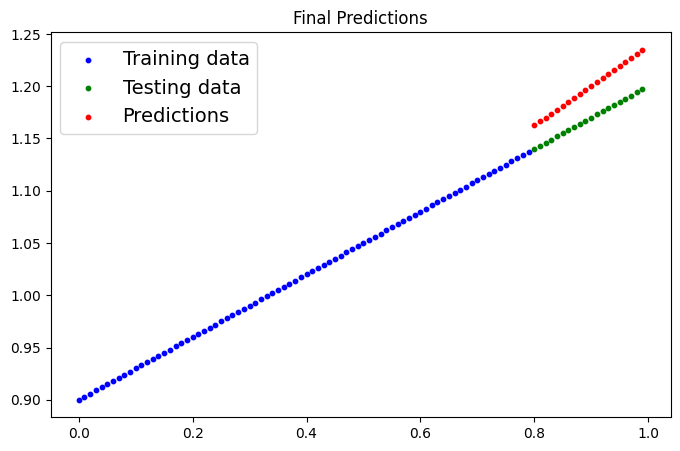

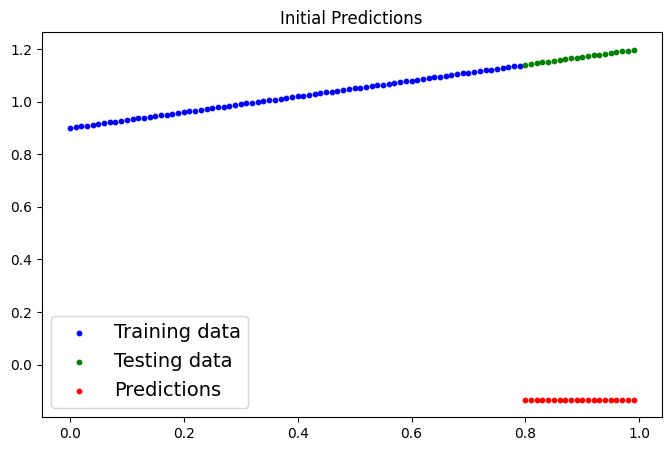

In [191]:
model.eval()
with torch.inference_mode():
  preds=model(X_test)
plot_predictions(predictions=preds,title="Final Predictions"),plot_predictions(predictions=initial_preds,title="Initial Predictions")